<a href="https://colab.research.google.com/github/Paolo20224/Prueba/blob/main/Belt_Exam_drug200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/drug200.csv"
df = pd.read_csv(filename)

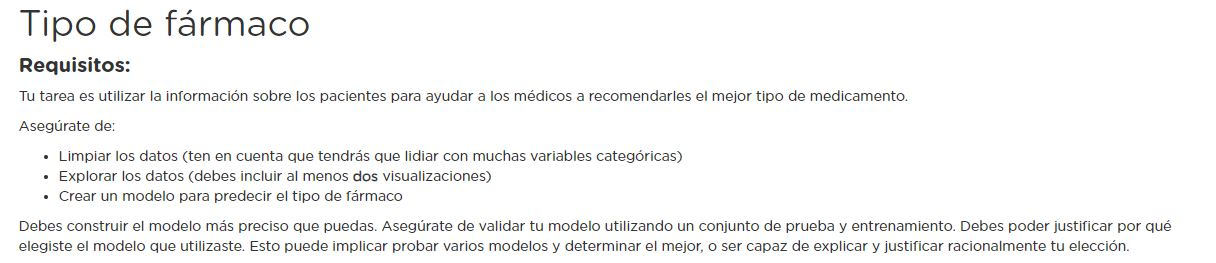

1.Exploración y depuración de datos

In [13]:
# A continuacion revisaremos aquellos datos nulos para ver la integridad de la informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


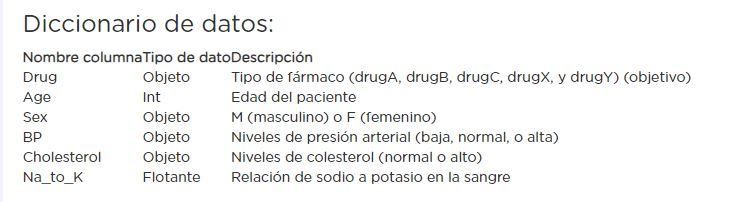

In [14]:
# Existe una consistencia completa entre el diccionario de datos y el dataframe incorporado, lo que permite inicialmente comenzar a confiar en dicha base de datos.

In [15]:
# Revisaremos los primero diez datos para dimensionar la magnitud de la info
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [16]:
# Tal como se vio en elementos anteriores, no existe ningun dato nulo, sin embargo ahora evaluaremos si existe algun dato duplicado
duplicados = df.duplicated()
duplicados.sum()

0

In [17]:
#Solo a objetos poder revisar la data en toda su detalle realizaremos una revision directa en excel
df.to_excel("drug200e.xlsx", index=False)

Consideraciones Iniciales:

    1. **Variables Categoricas**: Las variables sexo, BP, Cholesterol & Drug se visualizan como variables categoricas, sin embargo y para efectos de mejorar nuestro estudio de las mismas, seran reinterpretadas como variables cuantitativas a traves de un diccionario individual para cada una.

    2. Target: el objetivo principal de nuestro request es poder predecir nuestra variable objetivo, en este caso; "Drug", la cual es una variable categoria, lo que a priori nos permitira trabajar con nuestros conocidos modelos de aprendizaje automatico para valores categoricos (KNN, Random forest, etc).